In [1]:
import IPython.display as ipd
import librosa as lb

In [2]:
#https://www.analyticsvidhya.com/blog/2017/08/audio-voice-processing-deep-learning/
#https://datahack.analyticsvidhya.com/contest/practice-problem-urban-sound-classification/ 


In [3]:
data, sampling_rate = lb.load('C:/Users/noaim/Downloads/train/Train/0.wav')

In [4]:
import matplotlib.pyplot as plt

In [5]:
plt.figure(figsize=(12, 4))

<Figure size 864x288 with 0 Axes>

<Figure size 864x288 with 0 Axes>

In [6]:
from librosa import display as dp

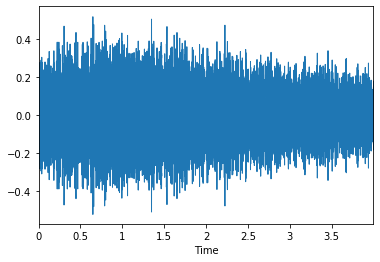

In [7]:
img = dp.waveplot(data, sr=sampling_rate)


In [8]:
import os

In [9]:
import pandas as pd
import glob
import numpy as np

In [10]:
train_labels = pd.read_csv("C:/Users/noaim/Downloads/train/train.csv")
y_train = np.array(train_labels["Class"])

In [11]:
y = []
x = []
dir_path = "C:/Users/noaim/Downloads/train/Train/" 
for i in range(len(train_labels)):
    y.append(train_labels["Class"][i]) ## label
    file_name = dir_path + str(train_labels["ID"][i]) + ".wav"
    data, sampling_rate = lb.load(file_name, res_type='kaiser_fast')
    mfccs = np.mean(lb.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=40).T,axis=0) ## feature
    x.append(mfccs)

In [12]:
x = np.array(x)
y = np.array(y)

In [13]:
x.shape, y.shape

((5435, 40), (5435,))

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
l = LabelEncoder()

In [16]:
from keras.utils.np_utils import to_categorical
y = to_categorical(l.fit_transform(y))

Using TensorFlow backend.


In [17]:
x.shape, y.shape

((5435, 40), (5435, 10))

In [18]:
import keras 
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Dense(units = 32, activation = "relu", input_shape = (40,)))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [21]:
model.add(Dense(units = 10, activation = "relu"))

In [22]:
model.add(Dense(units = 10, activation = "softmax"))

In [23]:
model.add(Dropout(0.3))

In [24]:
model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [25]:
model.fit(x, y, batch_size = 30, epochs = 50)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/50
5435/5435 [==============================] - 1s 143us/step - loss: 7.7524 - accuracy: 0.1236
Epoch 2/50
5435/5435 [==============================] - 0s 85us/step - loss: 6.2173 - accuracy: 0.1295
Epoch 3/50
5435/5435 [==============================] - 0s 78us/step - loss: 6.1661 - accuracy: 0.1523
Epoch 4/50
5435/5435 [==============================] - 0s 80us/step - loss: 5.9588 - accuracy: 0.1943
Epoch 5/50
5435/5435 [==============================] - 0s 79us/step - loss: 5.8967 - accuracy: 0.2050
Epoch 6/50
5435/5435 [==============================] - 0s 83us/step - loss: 5.9549 - accuracy: 0.2248
Epoch 7/50
5435/5435 [==============================] - 0s 81us/step - loss: 5.9830 - accuracy: 0.2423
Epoch 8/50
5435/5435 [==============================] - 0s 79us/step - loss: 5.9339 - accuracy: 0.2574
Epoch 9/50
5435/5435 [==============================] - 0s 79us/step - loss: 6.0